In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [8]:
data.Gender.nunique()

2

Text(0.5, 1.0, 'Box plot of Age')

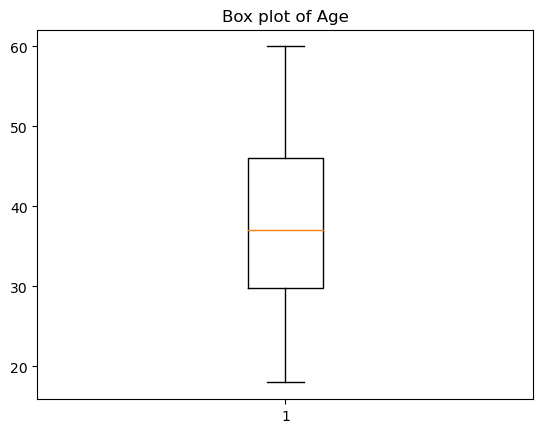

In [9]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of EstimatedSalary')

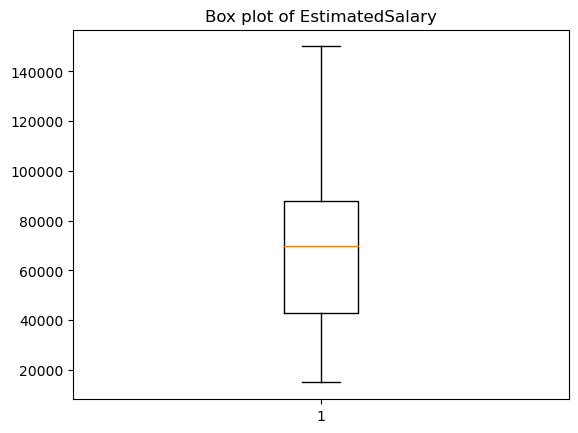

In [10]:
plt.boxplot(data['EstimatedSalary'])
plt.title('Box plot of EstimatedSalary')

Text(0.5, 1.0, 'Box plot of Purchased')

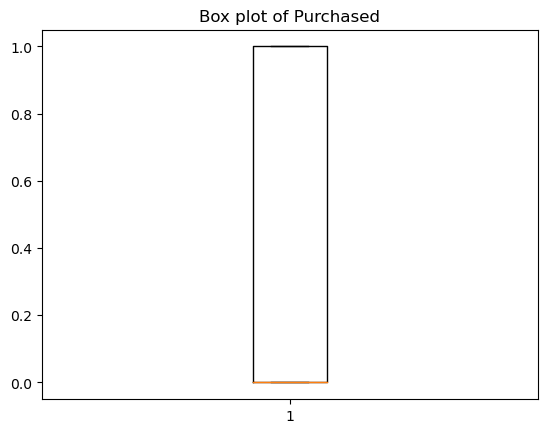

In [11]:
plt.boxplot(data['Purchased'])
plt.title('Box plot of Purchased')

In [12]:
q1 = np.percentile(data['Age'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Age'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Age'],75,
                   interpolation='midpoint')
print(q1)
print(q2)
print(q3)

29.5
37.0
46.0


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_1604\836005537.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Age'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_1604\836005537.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Age'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_1604\836005537.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to r

In [13]:
data['Age'].median()

37.0

In [14]:
iqr=q3-q1
low_limit=q1-(1.5*iqr)
up_limit=q3+(1.5*iqr)
print(low_limit)
print(up_limit)

4.75
70.75


In [15]:
outlier = []
for x in data['Age']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[]

In [16]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])
data['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [18]:
data.columns
y=data['Purchased']
x=data.drop('Purchased',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)


In [21]:
from sklearn.metrics import mean_squared_error
print('MSE IS :',mean_squared_error(y_test,prediction))

MSE IS : 0.09949629077063994


In [22]:
from sklearn.metrics import r2_score
print('R Squared Value IS :',r2_score(y_test,prediction))

R Squared Value IS : 0.5626536669422422


In [23]:
x.describe()

,User ID,Gender,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000
std,7.165832e+04,0.500526,10.482877,34096.960282
min,1.556669e+07,0.000000,18.000000,15000.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000
max,1.581524e+07,1.000000,60.000000,150000.000000


In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)

In [26]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.161116e-15,8.881784e-18,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.744488e+00,-9.801961e-01,-1.877311e+00,-1.607506e+00
25%,-9.050886e-01,-9.801961e-01,-7.550313e-01,-7.852897e-01
50%,3.914760e-02,-9.801961e-01,-6.256110e-02,7.561451e-03
75%,8.219131e-01,1.020204e+00,7.970571e-01,5.361289e-01
max,1.728357e+00,1.020204e+00,2.134241e+00,2.356750e+00


In [27]:
x_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print(' R squared value is :',r2_score(y_test,prediction))

MSE Is: 1560760315.864733
 R squared value is : -6860484903.899924


C:\Users\ATHUL AKSHAY\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: >

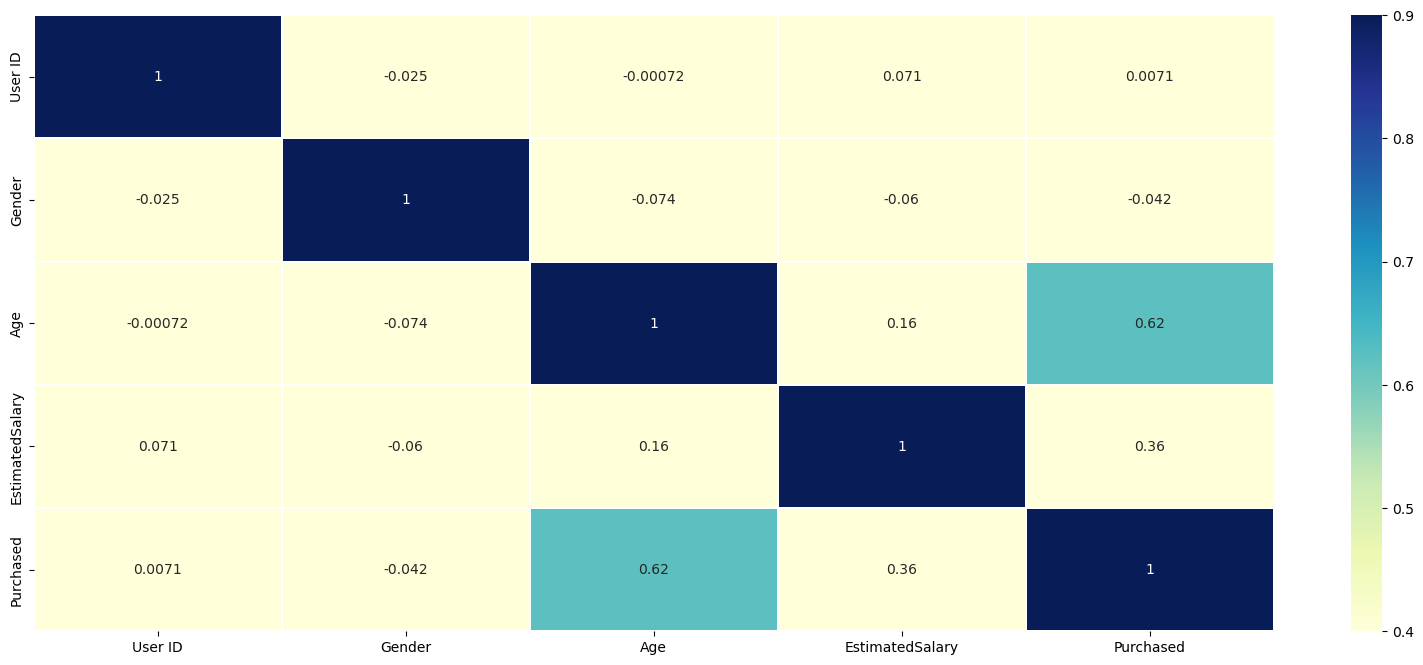

In [28]:
corrmatrix =data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')